# Bike Rental in Seoul

KATE expects your code to define variables with specific names that correspond to certain things we are interested in.

KATE will run your notebook from top to bottom and check the latest value of those variables, so make sure you don't overwrite them.

* Remember to uncomment the line assigning the variable to your answer and don't change the variable or function names.
* Use copies of the original or previous DataFrames to make sure you do not overwrite them by mistake.

You will find instructions below about how to define each variable.

Once you're happy with your code, upload your notebook to KATE to check your feedback.

The dataset used in this assignment was collected to help predict the demand for bike rental in Seoul at any given day and time. It can be found in the University of California Irvine [Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Seoul+Bike+Sharing+Demand).

The goal of this assignment is to preprocess the input variables into a format that makes them most useful for a linear regression model.

To begin with, let's import the necessary libraries and read in the data:

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.dpi"] = 120

data = pd.read_csv("data/seoul_bike_data.csv")

## Initial data inspection

Now that we have the dataset loaded in, let's inspect it with the methods `.info()` and `.head()`. 

Note that the variable `Rented Bike Count` is the target variable we are aiming to predict in this assignment.

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8743 non-null   object 
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [3]:
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,30%-70%,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,30%-70%,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,30%-70%,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,30%-70%,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,30%-70%,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


As we can see, there are a lot of different variables which take very different ranges, very different units, and, accordingly, have very different interpretations.

## Categorical vs. Continuous Variables

We must analyse each variable and decide how to preprocess it. Some variables are given in a discrete format, but it makes sense to make them continuous, and vice-versa. 

**Q1. Which variable columns are continuous quantities and which are categorical?**


Create two lists, `categorical` and `continuous` which contain the column indices for the categorical and continuous fields, respectively.

In [4]:
# Add your code below
categorical = [0, 4, 11, 12, 13]
continuous = [1, 2, 3, 5, 6, 7, 8, 9, 10]


**Q2. Transform the `Date` variable to a continuous value.**


The `Date` variable could be informative about a trend over time, and can be interpreted as a continuous variable for time. 

Using `.copy()`, create a copy of `data` called `data_date`. 

From `data_date`, create a new variable containing the values of the `Date` column, but converted to a datetime format (using `pd.to_datetime`). Be sure to specify `format="%d/%m/%Y"` otherwise `pandas` may incorrectly parse the dates.

Next, compute **the number of days** between each of these dates and the reference date `01/01/2017` and assign this to a new column in `data_date` called `DayCount`.


Leave the `Date` column unchanged.

*Hint: use the `pd.to_datetime()` function and subtract the values in the `Date` column from the reference date.*

In [90]:
# Add your code below
data_date = data.copy()
ref = pd.to_datetime('01/01/2017', format="%d/%m/%Y")
data_date['DayCount'] = (pd.to_datetime(data_date.Date, format="%d/%m/%Y") - ref).dt.days

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype          
---  ------                     --------------  -----          
 0   Date                       8760 non-null   datetime64[ns] 
 1   Rented Bike Count          8760 non-null   int64          
 2   Hour                       8760 non-null   int64          
 3   Temperature(°C)            8760 non-null   float64        
 4   Humidity(%)                8743 non-null   object         
 5   Wind speed (m/s)           8760 non-null   float64        
 6   Visibility (10m)           8760 non-null   int64          
 7   Dew point temperature(°C)  8760 non-null   float64        
 8   Solar Radiation (MJ/m2)    8760 non-null   float64        
 9   Rainfall(mm)               8760 non-null   float64        
 10  Snowfall (cm)              8760 non-null   float64        
 11  Seasons                    8760 non-null   object       

**Q3. Create a new DataFrame with the one-hot representation of the season**


Categorical variables must be formatted to a one-hot representation to be ready for a linear regression model. Create $4$ new columns with the one-hot representation of the Seasons (`Spring`, `Summer`, `Autumn`, and `Winter`, in this order.)

Before starting, create a copy of `data_date` called `data_season` using the `.copy()` method.

*Hint: for each new column we will have rows with values `True` or `False`. To get these values, you can compare the value of the `Seasons` column to that of the new column of interest.*

*In other words the new columns will look like:*

...|Seasons|...|Spring|Summer|Autumn|Winter
---|---|---|---|---|---|---
...|Autumn|...|False|False|True|False
...|Spring|...|True|False|False|False

In [11]:
# Add your code below
data_season = data_date.copy()
data_season["Spring"] = data_date["Seasons"] == "Spring"
data_season["Summer"] = data_date["Seasons"] == "Summer"
data_season["Autumn"] = data_date["Seasons"] == "Autumn"
data_season["Winter"] = data_date["Seasons"] == "Winter"


Once you have implemented the above, uncomment and run the cell below:

In [12]:
data_season.sample(3)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,DayCount,Spring,Summer,Autumn,Winter
4409,2018-06-02,2025,17,28.9,<30%,2.7,1965,5.0,1.93,0.0,0.0,Summer,No Holiday,Yes,517 days,False,True,False,False
7840,2018-10-23,1294,16,16.1,30%-70%,1.3,898,10.6,0.83,0.0,0.0,Autumn,No Holiday,Yes,660 days,False,False,True,False
6546,2018-08-30,1887,18,26.1,>70%,2.4,1066,20.6,0.19,0.0,0.0,Summer,No Holiday,Yes,606 days,False,True,False,False


**Q4. Transform the categorical `Humidity(%)` variable into a continuous quantity.**


In some cases variables are given as discrete categories, but are representing ranges of a continuous values, for example the variable `Humidity(%)`.

Using `.copy()`, create a copy of `data_season` called `data_humidity`. 

Transform the variable `Humidity(%)` to a continuous quantity. Use the mean value of each category as its continuous value (e.g. if a category is "10%-20%", replace it with 15).

If the value of the category is ">70%", use 85 as its mean value. Similarly, if it is "<30%", use 15 as its mean value.

Keep the same column name.

*Hint: You may want to use the `df.replace()` method.*

In [24]:
# Add your code below
data_humidity = data_season.copy()
data_humidity["Humidity(%)"] = data_humidity["Humidity(%)"].replace({"<30%":15, "30%-70%":50, ">70%": 85})


Once you have implemented `data_humidity`, uncomment and run the following cell:

In [25]:
data_humidity["Humidity(%)"].value_counts()

Humidity(%)
50.0    5413
85.0    2612
15.0     718
Name: count, dtype: int64

## Normalisation

Let us inspect the distribution of the continuous variables.

Use the method `.describe()` to produce some basic statistics.

In [26]:
data.describe()

,Rented Bike Count,Hour,Temperature(°C),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


**Q5. Visualize the distribution of continuous variables.**


Inspect the histograms of the continuous variables in our data using the `.hist()` method. Assign the plot to a variable called `continuous_fig`.

Note that since we have only been altering categorical variables so far, you should use the original `data` DataFrame in this question.

*Hint: use the method `plt.tight_layout()` after calling `.hist()` to create a better arrangement of subplots.*

<Figure size 768x576 with 0 Axes>

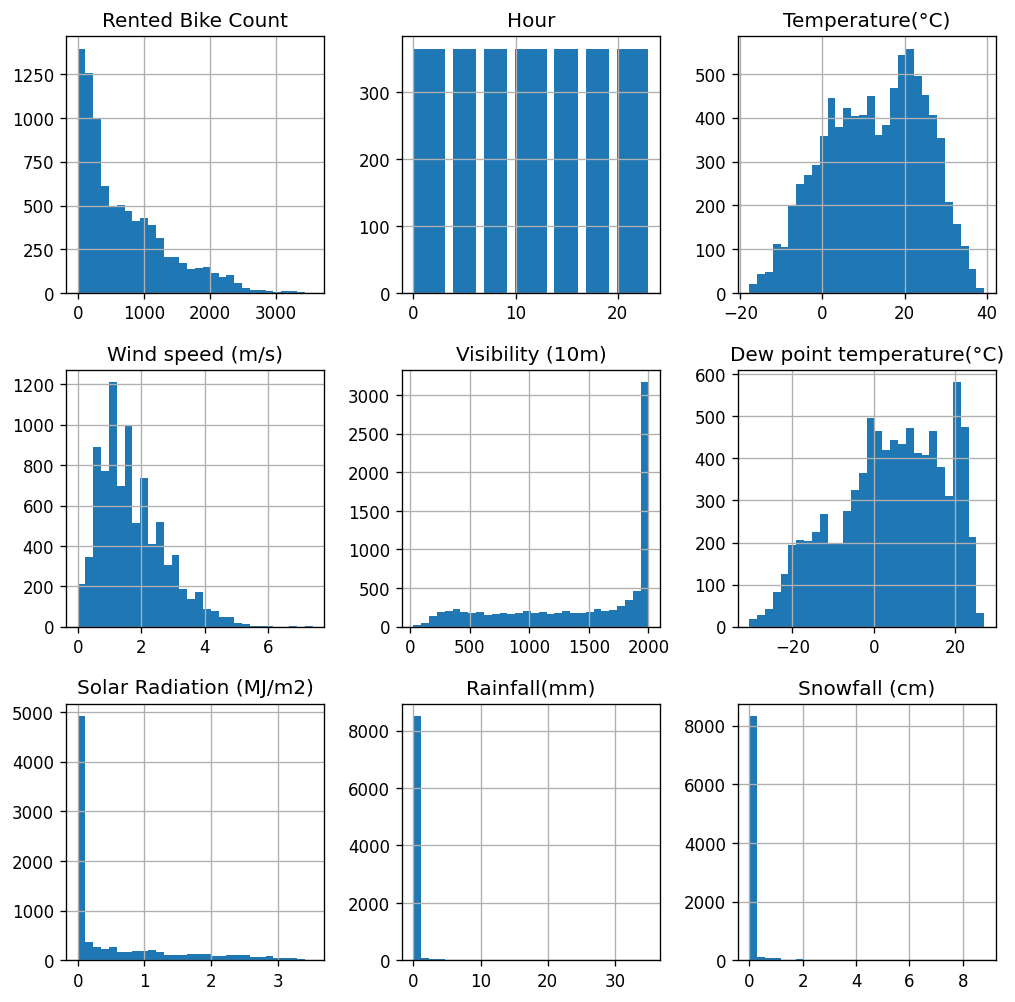

In [30]:
# We create a new figure to make other figures in the notebook don't get modified
plt.figure()

# Add your code below
continuous_fig = data_humidity.iloc[:, continuous].hist(bins = 30, figsize = (10, 10))

**Q6. Convert continuous variables into categorical variables.**


Note that in the histograms above, these continuous variables have very distinct distribution profiles. For instance, some variables have a very high frequency for a specific value (e.g. zero Solar Radiation). 

It might be useful to have such distinctive values as additional categorical variables.

Create a new DataFrame with four additional columns with the binary variables for values that occur particularly often in the variables `Solar Radiation`, `Snowfall`, `Rainfall` and `Visibility`. 
Create the new columns called `Zero Solar Radiation`, `Zero Snowfall`, `Zero Rainfall` and `Max Visibility`, in this order. 

For instance, the binary variable `Zero Solar Radiation` will indicate if `Solar Radiation` is _close to_ zero (in this question, if it is smaller than 0.1). The same is true for columns `Zero Snowfall` and `Zero Rainfall`.

Since the most common `Visibility` value is not zero, the binary variable `Max Visibility` will indicate if `Visibility` is _close to_ its maximum value (i.e. if its value is greater than its max value - 0.1).

First, however, create a copy of `data_humidity` using the `.copy()` method. Call your new DataFrame `data_binary`.

In [40]:
# Add your code belowc
data_binary = data_humidity.copy()
data_binary["Zero Solar Radiation"] = data_binary["Solar Radiation (MJ/m2)"] < .1
data_binary["Zero Snowfall"] = data_binary["Snowfall (cm)"] < .1
data_binary["Zero Rainfall"] = data_binary["Rainfall(mm)"] < .1
data_binary["Max Visibility"] = data_binary["Visibility (10m)"] > max(data_binary["Visibility (10m)"])-.1


Once you have created these new columns, uncomment and run the following cell:

In [41]:
data_binary["Zero Solar Radiation"].value_counts()

Zero Solar Radiation
1    4843
0    3917
Name: count, dtype: int64

**Q7. Normalise variables.**


It is important to ensure that input data are all scaled to the same range. Without this, the model may produce inaccurate predictions. Normalising each input variable can help train the model, allow easier interpretation of the learned parameters, and offer better regularisation.

Normalise each of the continuous variables in `data` to a *z-scored* DataFrame (such that each column has zero mean and unit variance). Use the transformation:

$$z = \frac{x - \mu}{\sigma}$$

Where `x` is the original column values, `μ` is the mean of the column, and `σ` is the standard deviation of the column.

Save the results in a different DataFrame, `data_z`, and visualise the new distributions using the `.hist()` and `plt.tight_layout()` methods.

Assign the plot to a variable called `normalise_fig`.

*Hint: use the `mean()` and `std()` methods for the chosen columns.*

<Figure size 768x576 with 0 Axes>

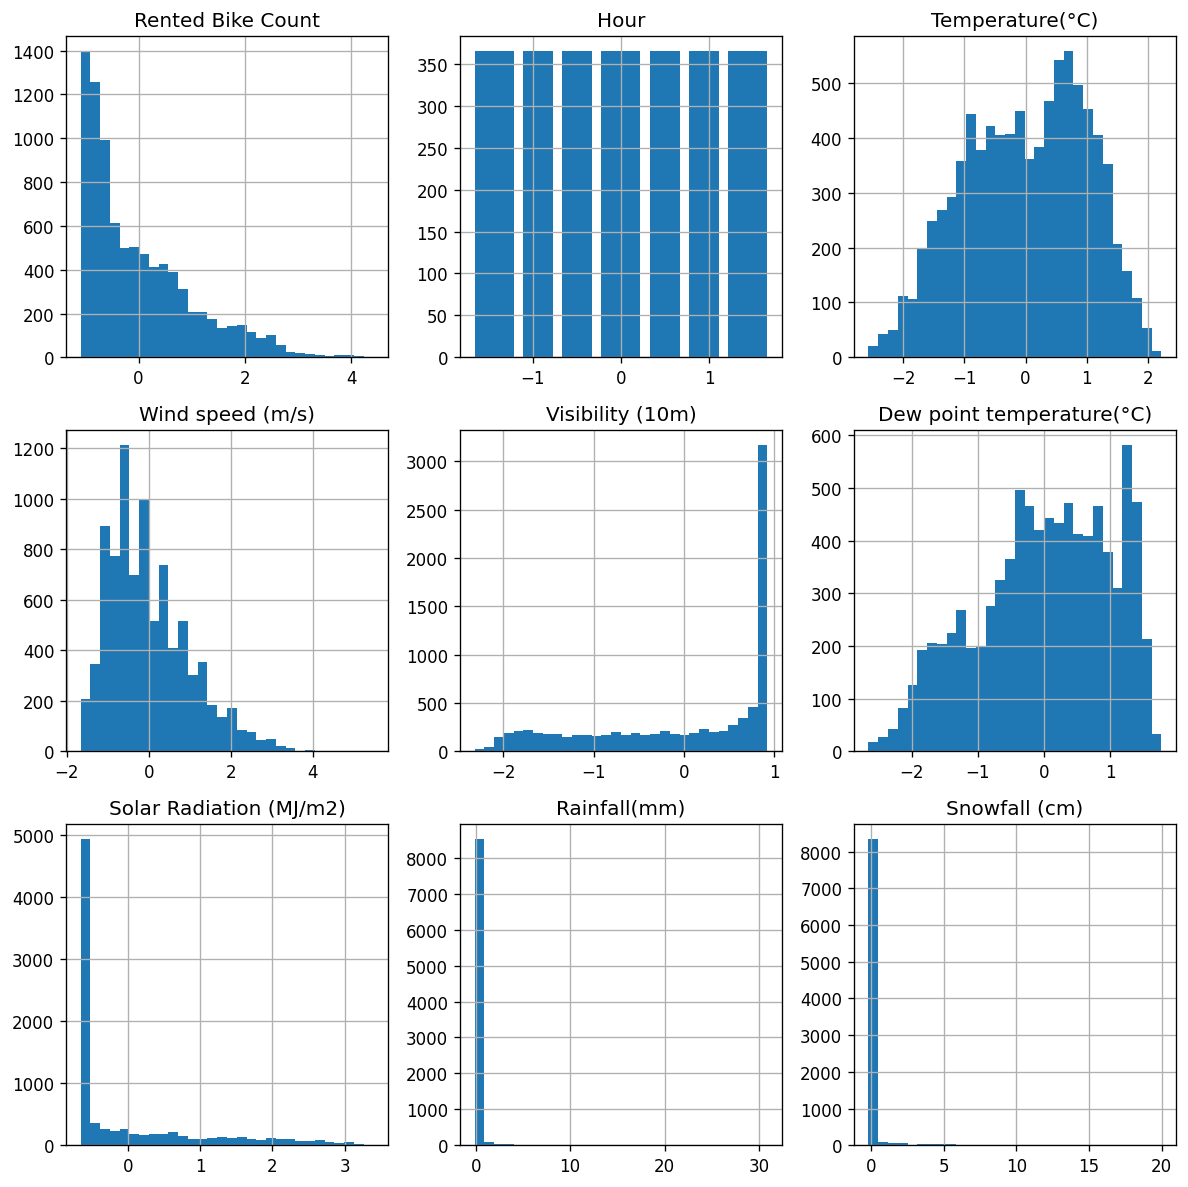

In [103]:
# We create a new figure to make other figures in the notebook don't get modified
plt.figure()

# Add your code below
data_z = data.copy()

cols = ['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']

# Normalize all continuous variables
data_z = (data_z.loc[:, cols] - data_z.loc[:, cols].mean())/data_z.loc[:, cols].std()

normalise_fig = data_z.loc[:, cols].hist(bins = 30, figsize = (10, 10))

# Adjust subplot parameters to give specified padding
plt.tight_layout()

# Show the plot
plt.show()


## Advanced discretisation

**Q8. Discretising a circular variable.**


Some continuous variables are not actually linear variables, and are not a natural input to a linear model. For example, `Hour` is a circular variable - the values 23 and 1 are actually close together in the day. 

Let us transform `Hour` into discrete categories.  Divide the variable into 5 categories: `Morning` (6-10), `Afternoon` (11-16), `Evening` (17-19), `Night` (20-23), `Early Morning` (0-5).

For example:

...|Hour|...|Morning|Afternoon|Evening|Night|Early Morning
---|---|---|---|---|---|---|---
...|1|...|False|False|False|False|True
...|13|...|False|True|False|False|False


First, however, create a copy of `data_binary` using the `.copy()` method. Call your new DataFrame `data_time_categories`.

In [63]:
# Add your code below
data_time_categories = data_binary.copy()
data_time_categories["Morning"] = (data_time_categories["Hour"] >= 6) & (data_time_categories["Hour"] <= 10)
data_time_categories["Afternoon"] = (data_time_categories["Hour"] >= 11) & (data_time_categories["Hour"] <= 16)
data_time_categories["Evening"] = (data_time_categories["Hour"] >= 17) & (data_time_categories["Hour"] <= 19)
data_time_categories["Night"] = (data_time_categories["Hour"] >= 20) & (data_time_categories["Hour"] <= 23)
data_time_categories["Early Morning"] = (data_time_categories["Hour"] >= 0) & (data_time_categories["Hour"] <= 5)


Once you have implemented the above question, uncomment and run the following cell:

In [64]:
data_time_categories["Morning"].value_counts()

Morning
False    6935
True     1825
Name: count, dtype: int64

**Q9. Inspecting target variable dependency.**


The categories chosen above for `Hour` were rather arbitrary. One more advanced data preprocessing step is to inspect how a given input variable influences the target variable. 

Let's use the `seaborn` library to plot this dependency in detail - how the target variable `Rented Bike Count` depends on `Hour` - with the `sns.violinplot()` method. It shows the distribution of bike rentals for each hour of the day. Assign the output of the plot to a variable called `bike_hour_dependency`. For input data, use the `data` DataFrame.

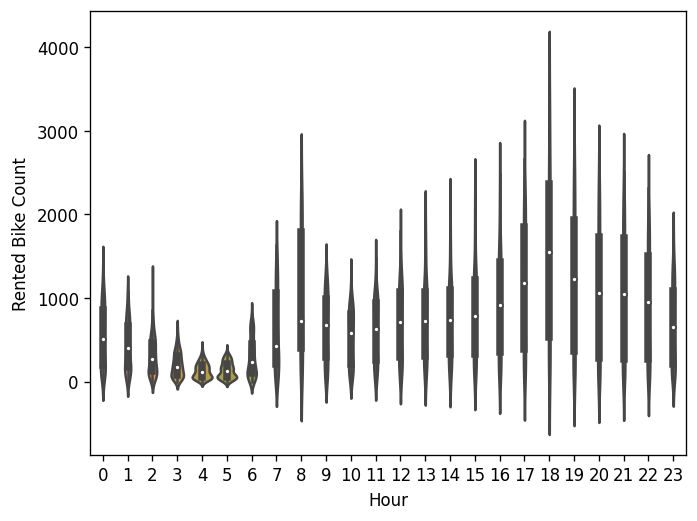

In [65]:
# We create a new figure to make other figures in the notebook don't get modified
plt.figure()

# Add your code below
bike_hour_dependency = sns.violinplot(x = "Hour", y = "Rented Bike Count", data = data_time_categories)


We can see that there is complex relation between the variables. Note that as linear models are only sensitive to the mean correlation between variables (not the full distribution), we can focus on the mean values.

**Q10. Calculate the mean `Rented Bike Count` for each hour of the day.**


Use the methods `.groupby()` and `.mean()` on the `data` DataFrame, save the result to a variable called `mean_count`, and plot the result using `.plot()`.

In [67]:
# Add your code below
mean_count = data_time_categories.groupby("Hour")["Rented Bike Count"].mean()


Hour
0      541.460274
1      426.183562
2      301.630137
3      203.331507
4      132.591781
5      139.082192
6      287.564384
7      606.005479
8     1015.701370
9      645.983562
10     527.821918
11     600.852055
12     699.441096
13     733.246575
14     758.824658
15     829.186301
16     930.621918
17    1138.509589
18    1502.926027
19    1195.147945
20    1068.964384
21    1031.449315
22     922.797260
23     671.126027
Name: Rented Bike Count, dtype: float64

**Q11. Discretise nonlinear dependency.**


We see in the plot above, a highly nonlinear effect of the variable `Hour` on the mean of the target variable `Rented Bike Count`. A linear model is not sensitive to this and it is a strong indication that discretisation of the variable will help. As above, let's create categorical variables for different ranges of `Hour`, but now taking into account the dependency of the target variable.

We expect that a category will be more predictive if the target does not vary too much for samples of that category. For instance, the target value is similar for the hours 10, 11, 12 and 13, indicating that the range `10 <= Hour < 14` might have good predictive power for the target.

Divide `Hour` into five new columns as follows:

New column name | Data
---|---
Hour Cat 1 | `3 <= Hour < 7`
Hour Cat 2 | `7 <= Hour < 10`
Hour Cat 3 | `10 <= Hour < 14`
Hour Cat 4 | `14 <= Hour < 22`
Hour Cat 5 | `22 <= Hour` or `Hour < 3`
 
Which will look like:

...|Hour|...|Hour Cat 1|Hour Cat 2|Hour Cat 3|Hour Cat 4|Hour Cat 5
---|---|---|---|---|---|---|---
...|2|...|False|False|False|False|True
...|9|...|False|True|False|False|False

First, create a copy of `data_time_categories` using the `.copy()` method. Call your new DataFrame `final_data`.

In [101]:
# Add your code below
final_data = data_time_categories.copy()
final_data["Hour Cat 1"] = (final_data["Hour"] >= 3) & (final_data["Hour"] < 7)
final_data["Hour Cat 2"] = (final_data["Hour"] >= 7) & (final_data["Hour"] < 10)
final_data["Hour Cat 3"] = (final_data["Hour"] >= 10) & (final_data["Hour"] < 14)
final_data["Hour Cat 4"] = (final_data["Hour"] >= 14) & (final_data["Hour"] < 22)
final_data["Hour Cat 5"] = (final_data["Hour"] >= 22) | (final_data["Hour"] < 3)



Notice that in this case an hour-by-hour division may even be reasonable. But on the other hand, too many input variables can lead to overfitting problems.

## Evaluating predictions

**Q12. Implement linear regression model.**


Create a function with a single argument `cols`, which takes as input a `list` of column names to be used to train the model.

You will need to assign these columns of the `final_data` DataFrame to a variable (`X`), assign the `Rented Bike Count` column to another variable (`Y`), and then use the `.fit()` method of the `LinearRegression` class to train your model.

Note that you will have to reshape your `Y` variable using the `.reshape()` method. It is currently an array (`[254, 204, ...]`) but the `LinearRegression` model expects it as an _array of arrays_ (`[[254], [204], ...]`).

Finally, use the `mean_squared_error` to compute the error. Once computed, return the error as a `float`.

In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# import numpy as np
# Add your code below
def prediction_error(cols):
    X = final_data.loc[:, cols]
    Y = final_data["Rented Bike Count"]
    # Y = [[y] for y in Y]  # Reshape Y
    model = LinearRegression()
    model.fit(X, Y)
    error = mean_squared_error(Y, model.predict(X)).astype("float")
    return error


Uncomment and run the code below to check your implementation.

In [79]:
prediction_error(["Temperature(°C)"])

295323.04138856236

**Q13. Compare performance of different `Hour` representations.**


Compare the predictions of our linear model on the original `Hour` variable versus our hand-crafted categorical representations (`Hour Cat 1`, `Hour Cat 2` etc).

Assign the output of the `prediction_error()` function to two variables:
  1. `model1`: for just the `Hour` variable.
  2. `model2`: for the categorical representations that we created.

Which model has the better performance? Note that with `mean_squared_error`, a lower error indicates a better fit to the data.

In [88]:
# Add your code below
model1 = prediction_error(["Hour"])
model2 = prediction_error(["Hour Cat 1", "Hour Cat 2", "Hour Cat 3", "Hour Cat 4", "Hour Cat 5"])

345961.18287118233


324592.33401092497

**Q14. Compare the prediction error based on the original variables to the prediction error for variables after preprocessing.**

1. Save to the variable `full_model_original`, the result of calling `prediction_error()` on the original columns which are suitable for a linear regression model. In this case these are `['Hour', 'Temperature(°C)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']`.
<br><br>
2. Save to the variable `full_model_updated`, the result of calling `prediction_error()` using our processed variables. For `full_model_updated`, include the variables from `full_model_original` that we didn't preprocess (like `Temperature(°C)`, `Wind speed (m/s)` etc), but where we have processed a variable (like `Hour`), don't include the unprocessed variable.

In [89]:
# Add your code below
full_model_original = prediction_error(['Hour', 'Temperature(°C)', 'Wind speed (m/s)', 'Visibility (10m)',
                                         'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'])
full_model_updated =full_model_updated = prediction_error(['Temperature(°C)'
                                       ,'Wind speed (m/s)'
                                       ,'Dew point temperature(°C)'
                                       ,'DayCount'
                                       ,'Spring'
                                       ,'Summer'
                                       ,'Autumn'
                                       ,'Winter'
                                       ,'Zero Solar Radiation'
                                       ,'Zero Snowfall'
                                       ,'Zero Rainfall'
                                       ,'Max Visibility'
                                       ,'Morning'
                                       ,'Afternoon'
                                       ,'Evening'
                                       ,'Night'
                                       ,'Early Morning'
                                       ,'Hour Cat 1'
                                       ,'Hour Cat 2'
                                       ,'Hour Cat 3'
                                       ,'Hour Cat 4'
                                       ,'Hour Cat 5'
                                       ])
print(full_model_original, full_model_updated)


221809.59060298433 197415.75723872913
